In [1]:
import json

In [2]:
data = json.load(open('/home/tonne/code/TrafficSignDetection/data/za_traffic_2020/traffic_train/train_traffic_sign_dataset.json'))

In [8]:
for i, d in enumerate(data):
    print(d)
    if (i+1)%10 == 0:
        break

info
images
annotations
categories


In [55]:
df_cate = pd.DataFrame()
for cate in data['categories']:
    df_cate = df_cate.append(cate, ignore_index=True)
df_cate.head()

,id,name,supercategory
0,1.0,Cấm ngược chiều,Cấm ngược chiều
1,2.0,Cấm dừng và đỗ,Cấm dừng và đỗ
2,3.0,Cấm rẽ,Cấm rẽ
3,4.0,Giới hạn tốc độ,Giới hạn tốc độ
4,5.0,Cấm còn lại,Cấm còn lại


In [62]:
import pandas as pd

df_image = pd.DataFrame(columns = ['file_name', 'height', 'width', 'id', 'street_id'])
for im in data['images']:
    df_image = df_image.append(im, ignore_index=True)

In [63]:
df_annotation = pd.DataFrame(columns = ['area', 'iscrowd', 'image_id', 'x', 'y', 'h', 'w', 'category_id', 'id'])

for annot in data['annotations']:
    bbox = annot['bbox']
    x, y, h, w = bbox

    im = {'area': annot['area'], 'iscrowd': annot['iscrowd'], 'image_id': annot['image_id'], 'x': x, 'y': y, 'h': h, 'w': w, 'category_id': annot['category_id'], 'id': annot['id']}
    df_annotation = df_annotation.append(im, ignore_index=True)

In [73]:
df_annotation.head()

,area,iscrowd,image_id,x,y,h,w,category_id,id
0,342,0,3,880,333,19,18,2,0
1,6889,0,5,1069,355,83,83,3,1
2,63,0,5,768,480,9,7,2,2
3,255,0,6,781,337,17,15,6,3
4,56,0,16,733,352,7,8,2,4


In [75]:
df_annotation['id'].shape, df_annotation['id'].nunique()

((11000,), 11000)

In [65]:
df_annotation['id'].shape, df_ann['id'].nunique()

,file_name,height,width,id,street_id
0,3.png,626,1622,3,3
1,5.png,626,1622,5,4
2,6.png,626,1622,6,5
3,16.png,626,1622,16,3
4,17.png,626,1622,17,8


In [66]:
df = pd.merge(df_annotation, df_image, on='id', how='left')

In [67]:
df_image['id'].nunique(), df_annotation['id'].nunique()

(4500, 11000)

In [68]:
df.head()

,area,iscrowd,image_id,x,y,h,w,category_id,id,file_name,height,width,street_id
0,342,0,3,880,333,19,18,2,0,NaN,NaN,NaN,NaN
1,6889,0,5,1069,355,83,83,3,1,NaN,NaN,NaN,NaN
2,63,0,5,768,480,9,7,2,2,NaN,NaN,NaN,NaN
3,255,0,6,781,337,17,15,6,3,3.png,626,1622,3
4,56,0,16,733,352,7,8,2,4,NaN,NaN,NaN,NaN


In [60]:
df = pd.merge(df, df_cate, on = 'id', how = 'left')

In [61]:
df.head()

,area,iscrowd,image_id,x,y,h,w,category_id,id,file_name,height,width,street_id,name,supercategory
0,342,0,3,880,333,19,18,2,0,NaN,NaN,NaN,NaN,NaN,NaN
1,6889,0,5,1069,355,83,83,3,1,NaN,NaN,NaN,NaN,Cấm ngược chiều,Cấm ngược chiều
2,63,0,5,768,480,9,7,2,2,NaN,NaN,NaN,NaN,Cấm dừng và đỗ,Cấm dừng và đỗ
3,255,0,6,781,337,17,15,6,3,3.png,626,1622,3,Cấm rẽ,Cấm rẽ
4,56,0,16,733,352,7,8,2,4,NaN,NaN,NaN,NaN,Giới hạn tốc độ,Giới hạn tốc độ


In [50]:
df['image_id'].nunique()

4500

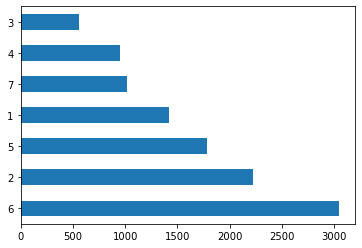

In [52]:
df['category_id'].value_counts().plot.barh()